<a href="https://colab.research.google.com/github/bhavanachem/AI-Python/blob/main/Image_Recognition_CNN/Rock_Paper_Scissors_cnn_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycocotools #web input
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=5e6b262de07ea4b9f086033546097a2400bbac6bcf41ede5f1633ffce608bbbd
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
work_dir = "/content/drive/MyDrive/SKILLIT Courses/AI Level 2/Final Project"
os.chdir(work_dir)

Mounted at /content/drive


Imports


In [ ]:
from colab_utils import imshow, videoGrabber    #helps show images on colab screen
import numpy as np
import matplotlib.pyplot as plt
from google.colab import output   #to clear screen

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tqdm.auto import tqdm      #status bar, training model status


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#define classes
CLASS_NAME = ['Paper', 'Rock', 'Scissor']   #adr 0,1,2
#define image capture function

def capture_images(numImage=50, label = 'Null'):
  vid = videoGrabber(showVideo=True, size = (60,40))  #videograbber imported
  img = []
  y=[]

  for x in tqdm(range(numImage)):
    new_image = np.array(vid(0))  #latest image saved in new_image
    img.append(new_image)
    if label!='Null':
      y.append(label) #saving either rock,paper,scissor
  img = np.array(img)
  y = np.array(y)       #converting to numpy array (easier)
  return img,y


In [ ]:
#now you have 100 images each for rock paper scissors
#each pixel has val bet 0 and 255 depending upon its brightness
#convert pixels bet 0 and 1 to match weights in neural network

paper_images, paper_label = capture_images(numImage = 100, label=0)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
rock_images, rock_label = capture_images(numImage=100, label = 1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
scissor_images, scissor_label = capture_images(numImage=100, label = 2)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
train_images = np.concatenate((paper_images, rock_images, scissor_images))
train_images = train_images/255
train_labels = np.concatenate((paper_label, rock_label, scissor_label))

In [ ]:
#300 images may not be enough for the model to learn from, so change features to make more images

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#creates a data generator obj that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

idx=0
new_train_images = []
new_train_labels = []
for image in train_images:
  img = image.reshape((1,)+image.shape) #make image 3d, 1x60x40 bc cant tranform without 3d
  i=0
  for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    #print(batch[0])
    plot = plt.imshow(batch[0])
    i+=1
    new_train_images.append(batch[0])
    new_train_labels.append(train_labels[idx])
    if i > 10:
      break
  idx+=1

  plt.show()




NameError: name 'train_images' is not defined

In [ ]:
new_train_images=np.array(new_train_images)
new_train_labels=np.array(new_train_labels)

In [ ]:
# create model and add cnn layers

model = models.Sequential() # adding layers
model.add(layers.Conv2D(32,(5,5), activation='relu', input_shape=(40,60,3))) #3 layers of color
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(5,5),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 56, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 24, 64)        51264     
                                                                 
Total params: 53696 (209.75 KB)
Trainable params: 53696 (209.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# need to classify images into R,P,S
#dense layer connected, received input from last

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 56, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 24, 64)        51264     
                                                                 
 flatten (Flatten)           (None, 21504)             0         
                                                                 
 dense (Dense)               (None, 64)                1376320   
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
#training the model

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

history = model.fit(new_train_images, new_train_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 18s 158ms/step - loss: 1.1064 - accuracy: 0.3333
Epoch 2/10
104/104 [==============================] - 16s 157ms/step - loss: 1.0655 - accuracy: 0.3888
Epoch 3/10
104/104 [==============================] - 16s 157ms/step - loss: 0.8949 - accuracy: 0.5618
Epoch 4/10
104/104 [==============================] - 20s 192ms/step - loss: 0.5735 - accuracy: 0.7600
Epoch 5/10
104/104 [==============================] - 17s 167ms/step - loss: 0.4029 - accuracy: 0.8485
Epoch 6/10
104/104 [==============================] - 17s 163ms/step - loss: 0.3103 - accuracy: 0.8836
Epoch 7/10
104/104 [==============================] - 16s 157ms/step - loss: 0.2487 - accuracy: 0.9070
Epoch 8/10
104/104 [==============================] - 16s 157ms/step - loss: 0.1803 - accuracy: 0.9330
Epoch 9/10
104/104 [==============================] - 16s 157ms/step - loss: 0.1285 - accuracy: 0.9536
Epoch 10/10
104/104 [==============================] - 16s 158ms/step - l

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Text(0.5, 1.0, 'Scissor')

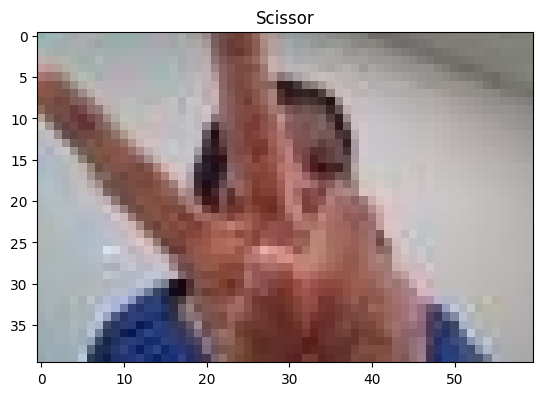

In [ ]:
#output calculation

test_image, _ = capture_images(1)  #label not defined yet

test_image = test_image/255 #pixel 0-1
prediction = model.predict(test_image)
plt.imshow(test_image[0])
plt.title(CLASS_NAME[np.argmax(prediction[0])])

In [ ]:
model.save('self-made_model.h5') #saving tensorflow = .h5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
